# Rehabilitation Program

## **Table of Contents**
- [**Problem statement**](#intro) 
- [**Importing Libraries**](#Implb)
- [**Importing Data**](#Impda)
- [**Data Exploration/Analysis**](#Analysis)
- [**Data Preprocessing**](#Preprocessing)
    - [Filling Missing values](#Missing)
    - [Converting features(Categorical) to Numerical Values](#Converting)
    - [ Normalizing and scaling features](#Normalizing)
- [**Building Machine Learning Models**](#Models)
    - [Logistic Regression ](#lr)
    - [Support Vector Machine Classifier](#svm)
    - [K-Nearest Neighbors](#knn)
    - [Naive Bayes](#gauss)
    - [Random Forest](#rf)
    - [Decisison Tree Model](#dt)
    - [Gradient Boosting](#gb)
    - [Neural Network](#nn)
    
    
    
    

- [**Interpretating the output**](#Output)   
- [**Confusion Matrix and ROC Curve**](#Evaluation)
- [**Conclusion**](#Conclusion)


<br>
<a id = 'intro'></a>
##  Problem statement

###### There is a dataset of patients available those are treated for cardiology problem and for whom there is a kind rehabilitation program goes on. Since as due to different reasons many were unable to participate in the program. So analysis is carried out in which data of all patients were taken regarding the reason for not joining the program where details of patients such as their gender, what is their age, whether they have the car or not and what is the distance of house/home of a particular individual from the rehabilitation program centre.  Using this it is required to build a model using different machine learning methods to predict whether a new patient based upon his details will join the program or not.

![rehabilitaion](https://www.lifespan.org/sites/default/files/lifespan-files/images/centers/center-for-cardiac-fitness/Cardio-Pulmonary-21.jpg)

<br>
<a id = 'Impda'></a>
## Importing Libraries

In [2]:

# data analysis

import numpy as np
import pandas as pd
import sklearn as sk


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning

%matplotlib notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

<br>
<a id = 'Impda'></a>
## Importing data


In [3]:
data = pd.read_csv('Data.csv', sep = ";", encoding = 'utf-16') #Reading csv files.

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           156 non-null object
Gender           500 non-null object
Age              500 non-null object
Mobility         500 non-null object
Distance         500 non-null object
Participation    500 non-null int64
dtypes: int64(1), object(5)
memory usage: 23.5+ KB


,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,M,"61,3",No car,"68,7",0
1,Hospital readmission,M,"85,8",Car,"86,3",0
2,Hospital readmission,F,65,No car,"46,2",1
3,Hospital readmission,F,"72,5",No car,"39,7",0
4,Hospital readmission,M,93,No car,"73,3",0


###### Converting data into suitable data types for analysis.

In [4]:
data['Age'] = data['Age'].str.replace(',', '.')
data['Distance'] = data['Distance'].str.replace(',', '.')
data['Age'] = pd.to_numeric(data['Age'])
data['Distance'] = pd.to_numeric(data['Distance'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           156 non-null object
Gender           500 non-null object
Age              500 non-null float64
Mobility         500 non-null object
Distance         500 non-null float64
Participation    500 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [6]:
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,M,61.3,No car,68.7,0
1,Hospital readmission,M,85.8,Car,86.3,0
2,Hospital readmission,F,65.0,No car,46.2,1
3,Hospital readmission,F,72.5,No car,39.7,0
4,Hospital readmission,M,93.0,No car,73.3,0


<br>
<a id = 'Analysis'></a>
## Data Exploration/Analysis.

#### Features Available in dataset

In [7]:
print(data.columns.values)

['Reason' 'Gender' 'Age' 'Mobility' 'Distance' 'Participation']


As from the data it is clear that 5 features are available such as **Reason** for not joining the program, **Gender** of the patient, **Age** of the patient, mean of **Mobility** for the patient, **Distance** of rehabilitation centre from there living location. 

#### Numerical features: Age, Distance 

**Continuous**: Age, Distance



##### Categorical features:
Reason, Gender, Mobiity     


##### Data types of features



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           156 non-null object
Gender           500 non-null object
Age              500 non-null float64
Mobility         500 non-null object
Distance         500 non-null float64
Participation    500 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


######  No. of people who actually joined the program.

In [9]:

data.loc[data['Participation']== 1 , 'Participation'].sum()

220

In [10]:
data.describe(include=['O'])

,Reason,Gender,Mobility
count,156,500,500
unique,10,2,2
top,Hospital readmission,M,No car
freq,42,266,269


1. **No. of males patients are more as compared to females.**
2. **There are 10 unique(excluding no reason) reasons given by patients regarding not joining the program/or having problemm to continue.**
3. **Almost half of patients don't have car.** 

In [11]:
data[['Gender', 'Participation']].groupby(['Gender'], as_index=False).mean().sort_values(by='Participation', ascending=False)

,Gender,Participation
0,F,0.461538
1,M,0.421053


- **No. of female patients who joined the program is more than the no. of male patients.**

In [12]:
data[['Reason', 'Participation']].groupby(['Reason'], as_index=False).mean().sort_values(by='Reason', ascending=False)

,Reason,Participation
9,Resumed work,0.500000
8,Own facilities,0.307692
7,Other program,0.333333
6,Other obligations,0.500000
5,Moved,0.142857
4,Medical reasons,0.421053
3,Lost interest,0.714286
2,Hospital readmission,0.500000
1,Forgot,0.166667
0,Disliked therapist,0.285714


- **People having own facility, or moved, forgot and disliked therapist are ones who mostly didn't participate in the program.**

In [13]:
data[['Mobility', 'Participation']].groupby(['Mobility'], as_index=False).mean().sort_values(by='Mobility', ascending=False)

,Mobility,Participation
1,No car,0.275093
0,Car,0.632035


- **People having car are most likely to participate in program.**

<IPython.core.display.Javascript object>


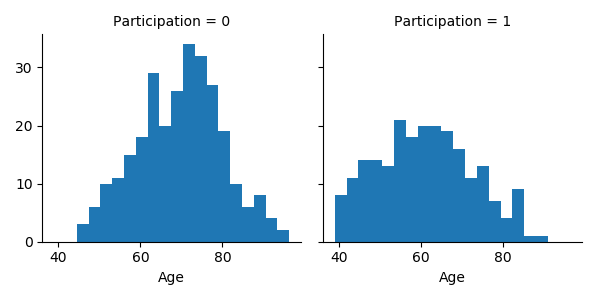

In [14]:
### Participation based on age
g = sns.FacetGrid(data, col='Participation')
g.map(plt.hist, 'Age', bins=18)


- **Most of people are in 50-80 age range. **
- **People mainly of age > 60 didn't participate in the program**
- **People mainly from age 40 to 60 participated in the program.**

<IPython.core.display.Javascript object>


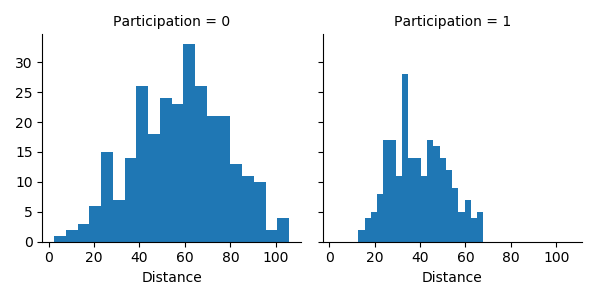

In [15]:
g = sns.FacetGrid(data, col='Participation')
g.map(plt.hist, 'Distance', bins= 20)


**Distance** - From histogram it clear that distance is a measured factor for people to join rehabilitation programs as people having distance below 50 - 55km are most likely to join. thus I will create a new band for it.


- **Most people who didn't participate the program were living at distance of 40 and above.**
- **Most people to participate the program were living at distance less than 60.**

<br>
<br>

<a id = 'Preprocessing'></a>
## Data Preprocessing

### Filling Missing values
<a id = 'Missing'></a>

In [16]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Reason           344
Gender             0
Age                0
Mobility           0
Distance           0
Participation      0
dtype: int64


###### Since only 'Reason' is missing in half of the data set, so I'm filling it with 'No reason'.

In [17]:
data.Reason = data.Reason.fillna('No reason') #Filling missing values of reason

<IPython.core.display.Javascript object>


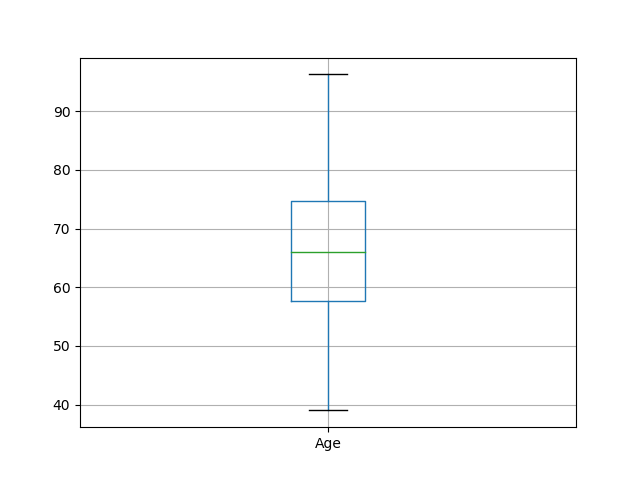

In [18]:
#Plotting box plot
plt.figure()
data.boxplot(column = 'Age', whis = 'range')

- **We can see that, Age is having few outliers whose values are about 39 and 97, So I'm taking log transformation of age to nullify its effect.**

In [19]:
data['Age'] = np.log(data['Age'])

<IPython.core.display.Javascript object>


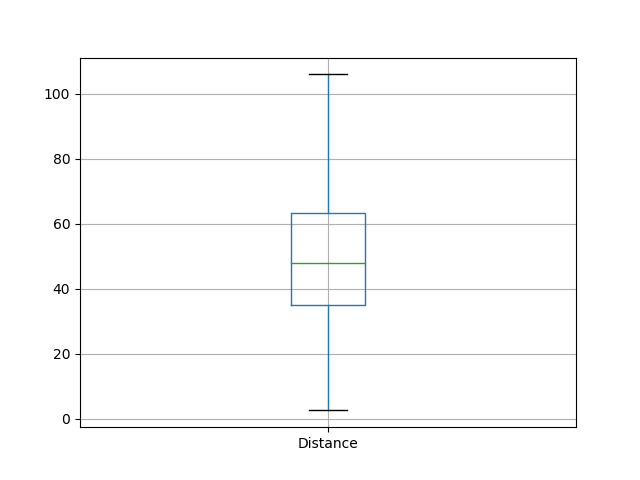

In [20]:
plt.figure()
data.boxplot(column = 'Distance', whis = 'range')

- **We can see that, as 'Age', Distance is also having few extreme values as outliers such as 5 and 110, So I'm taking log transformation of Distance to nullify its effect.**

In [21]:
data['Distance'] = np.log(data['Distance'])

<a id = 'Converting'></a>
### Converting features(Categorical) to Numerical Values

##### Converting **Gender** and Mobility feature to numeric values.

In [22]:
data['Gender'].replace(['F','M'],[0,1],inplace=True)
data['Mobility'].replace(['No car','Car'],[0,1],inplace=True)
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,1,4.115780,0,4.229749,0
1,Hospital readmission,1,4.452019,1,4.457830,0
2,Hospital readmission,0,4.174387,0,3.832980,1
3,Hospital readmission,0,4.283587,0,3.681351,0
4,Hospital readmission,1,4.532599,0,4.294561,0


###### Replacing reasons with numeric values and adding column reason values for model training.

In [23]:
data['Reason'].replace(['No reason','Hospital readmission','Other obligations','Resumed work','Medical reasons','Own facilities','Lost interest','Disliked therapist','Forgot','Moved','Other program'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,1,1,4.115780,0,4.229749,0
1,1,1,4.452019,1,4.457830,0
2,1,0,4.174387,0,3.832980,1
3,1,0,4.283587,0,3.681351,0
4,1,1,4.532599,0,4.294561,0


In [24]:
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,1,1,4.115780,0,4.229749,0
1,1,1,4.452019,1,4.457830,0
2,1,0,4.174387,0,3.832980,1
3,1,0,4.283587,0,3.681351,0
4,1,1,4.532599,0,4.294561,0


In [25]:
data.describe()


,Reason,Gender,Age,Mobility,Distance,Participation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.090000,0.532000,4.171654,0.462000,3.824097,0.440000
std,2.128606,0.499475,0.186001,0.499053,0.439844,0.496884
min,0.000000,0.000000,3.663562,0.000000,0.916291,0.000000
25%,0.000000,0.000000,4.053523,0.000000,3.549617,0.000000
50%,0.000000,1.000000,4.189655,0.000000,3.871201,0.000000
75%,1.000000,1.000000,4.313815,1.000000,4.148280,1.000000
max,10.000000,1.000000,4.567468,1.000000,4.662495,1.000000


<br>
<a id = 'Normalizing'></a>
### Normalizing and scaling the data using Min, Max values

- **Scaling** : Reason, age and distance

In [26]:
scaler = MinMaxScaler()
data[['Reason','Age','Distance']] = scaler.fit_transform((data[['Reason','Age','Distance']]))

In [27]:
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,0.1,1,0.500293,0,0.884484,0
1,0.1,1,0.872277,1,0.945367,0
2,0.1,0,0.565131,0,0.778572,1
3,0.1,0,0.685939,0,0.738097,0
4,0.1,1,0.961424,0,0.901785,0


In [28]:
data.describe()

,Reason,Gender,Age,Mobility,Distance,Participation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.109000,0.532000,0.562107,0.462000,0.776201,0.440000
std,0.212861,0.499475,0.205775,0.499053,0.117411,0.496884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.431417,0.000000,0.702932,0.000000
50%,0.000000,1.000000,0.582021,0.000000,0.788774,0.000000
75%,0.100000,1.000000,0.719381,1.000000,0.862737,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data.columns

Index(['Reason', 'Gender', 'Age', 'Mobility', 'Distance', 'Participation'], dtype='object')

In [30]:
predictors = ['Reason', 'Gender', 'Age', 'Mobility', 'Distance']
X = data[predictors]
X.columns

Index(['Reason', 'Gender', 'Age', 'Mobility', 'Distance'], dtype='object')

In [31]:
Target =  ['Participation']
Y = data[Target]
Y.columns

Index(['Participation'], dtype='object')

##### Distributing data     train: test: cross_validation = 60:20:20

In [32]:

import sklearn
from sklearn.utils import shuffle  
data = shuffle(data)              #Shuffling values of data

train_set, test_set = sklearn.model_selection.train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 1)

In [33]:
#Now splitting data also for cross validation set
train_set, val_set = sklearn.model_selection.train_test_split(train_set, train_size = 0.75, test_size = 0.25, random_state = 1)

In [34]:
#Assigning predictors and target columns of train_set
train_x = train_set[predictors]
train_y = train_set[Target]
print(train_x.columns)
print(train_y.columns)

Index(['Reason', 'Gender', 'Age', 'Mobility', 'Distance'], dtype='object')
Index(['Participation'], dtype='object')


In [35]:
#Assigning predictors and target columns of val_set
val_x = val_set[predictors]
val_y = val_set[Target]
print(val_x.columns)
print(val_y.columns)

Index(['Reason', 'Gender', 'Age', 'Mobility', 'Distance'], dtype='object')
Index(['Participation'], dtype='object')


In [36]:
#Assigning predictors and target columns of test_set
test_x = test_set[predictors]
test_y = test_set[Target]
print(test_x.columns)
print(test_y.columns)

Index(['Reason', 'Gender', 'Age', 'Mobility', 'Distance'], dtype='object')
Index(['Participation'], dtype='object')


In [37]:
test_x.head()

,Reason,Gender,Age,Mobility,Distance
467,0.0,1,0.530556,1,0.760650
479,0.0,0,0.558302,1,0.790438
164,0.0,1,0.553152,0,0.714197
151,1.0,0,0.439073,1,0.725711
396,0.0,1,0.476579,1,0.736748


In [38]:
val_x.head()

,Reason,Gender,Age,Mobility,Distance
333,0.0,0,0.867108,1,0.867231
363,0.0,1,0.530556,1,0.761883
171,0.0,1,0.582021,1,0.580521
285,0.0,0,0.830227,1,0.653341
364,0.0,1,0.685939,0,0.879385


In [39]:
train_x.shape, test_x.shape, val_x.shape

((300, 5), (100, 5), (100, 5))

In [40]:

print(train_y.shape, test_y.shape, val_y.shape)

(300, 1) (100, 1) (100, 1)


 <br>
 <br>
 <br>
# Building Machine Learning Models
 <a id = 'Models'></a>

 <br>
<a id = 'lr'></a>
## 1. Using Logistic regression model to predict the values.

In [41]:

# clf = LogisticRegression.fit(train_x, train_y)
# from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(C = 100)
lr.fit(train_x, train_y.values.ravel())
pred_test_lr= lr.predict(val_x)
pred_valid_lr= lr.predict(test_x)


# Calculating accuracy results

acc_log = round(lr.score(train_x, train_y) * 100, 2)
print("Accuracy of Logistic regression classifier on training set: ",acc_log)
val_log = round(lr.score(val_x, val_y) * 100, 2)
print("Accuracy of Logistic regression classifier on cross validation set: ",val_log)
test_log = round(lr.score(test_x, test_y) * 100, 2)
print("Accuracy of Logistic regression classifier on test set: ",test_log)


Accuracy of Logistic regression classifier on training set:  78.33
Accuracy of Logistic regression classifier on cross validation set:  78.0
Accuracy of Logistic regression classifier on test set:  68.0


<br>
<a id = 'svm'></a>
## 2. Applying Support Vector Machine Algorithm

The model generates a confidence score which is higher than Logistics Regression model.

In [42]:
# clf = LogisticRegression.fit(train_x, train_y)
# from sklearn.linear_model import LogisticRegression 
svc = SVC()
svc.fit(train_x, train_y.values.ravel())
pred_yv = svc.predict(val_x)
pred_yt = svc.predict(test_x)


# Calculating accuracy results

acc_svc = round(svc.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_svc)
val_svc = round(svc.score(val_x, val_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_svc)
test_svc = round(svc.score(test_x, test_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_svc)


Accuracy of Support Vector Machine classifier on training set:  71.67
Accuracy of Support Vector Machine classifier on cross validation set:  76.0
Accuracy of Support Vector Machine classifier on test set:  61.0


<br>
<a id = 'knn'></a>
## 3. Applying K-Nearest Neighbors algorithm
KNN confidence score is better than Logistics Regression but worse than SVM.

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y.values.ravel())
pred_yv = knn.predict(val_x)
pred_yt = knn.predict(test_x)

# Calculating accuracy results

acc_knn = round(knn.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_knn)
val_knn = round(knn.score(val_x, val_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_knn)
test_knn = round(knn.score(test_x, test_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_knn)



Accuracy of Support Vector Machine classifier on training set:  90.33
Accuracy of Support Vector Machine classifier on cross validation set:  83.0
Accuracy of Support Vector Machine classifier on test set:  76.0


<br>
<a id = 'gauss'></a>
## 4. Applying Naive Bayes Classifier


In [44]:
gaussian = GaussianNB()
gaussian.fit(train_x, train_y.values.ravel())
pred_yv = gaussian.predict(val_x)
pred_yt = gaussian.predict(test_x)

# Calculating accuracy results

acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_gaussian)
test_gaussian = round(gaussian.score(test_x, val_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_gaussian)
val_gaussian = round(gaussian.score(val_x, test_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_gaussian)



Accuracy of Support Vector Machine classifier on training set:  78.33
Accuracy of Support Vector Machine classifier on test set:  59.0
Accuracy of Support Vector Machine classifier on cross validation set:  45.0


<br>
<a id = 'rf'></a>
## 5. Applying Random Forest Algorithm

In [45]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_x, train_y.values.ravel())
pred_valid_Rf = random_forest.predict(val_x)
pred_Rf = random_forest.predict(test_x)

# Calculating accuracy results

acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_random_forest)
val_random_forest = round(random_forest.score(val_x, val_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_random_forest)
test_random_forest = round(random_forest.score(test_x, test_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_random_forest)


Accuracy of Support Vector Machine classifier on training set:  100.0
Accuracy of Support Vector Machine classifier on cross validation set:  91.0
Accuracy of Support Vector Machine classifier on test set:  85.0


<br>
<a id = 'dt'></a>
## 6. Applying Decision Tree Algorithm

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y.values.ravel())
pred_yv = decision_tree.predict(val_x)
pred_yt = decision_tree.predict(test_x)

# Calculating accuracy results

acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)
print("Accuracy of Decision Tree classifier on training set: ",acc_decision_tree)
val_decision_tree = round(decision_tree.score(val_x, val_y) * 100, 2)
print("Accuracy of Decision Tree classifier on cross validation set: ",val_decision_tree)
test_decision_tree = round(decision_tree.score(test_x, test_y) * 100, 2)
print("Accuracy of Decision Tree classifier on test set: ",test_decision_tree)


Accuracy of Decision Tree classifier on training set:  100.0
Accuracy of Decision Tree classifier on cross validation set:  78.0
Accuracy of Decision Tree classifier on test set:  86.0


<br>
<a id = 'gb'></a>
## 7. Applying Gradient Boosting Classifier

In [47]:
gradient_boost = GradientBoostingClassifier(n_estimators = 100)
gradient_boost.fit(train_x, train_y.values.ravel())
pred_yv = gradient_boost.predict(val_x)
pred_yt = gradient_boost.predict(test_x)

# Calculating accuracy results

acc_gradient_boost = round(gradient_boost.score(train_x, train_y) * 100, 2)
print("Accuracy of Gradient Boosting Classifier on training set: ",acc_gradient_boost)
val_gradient_boost = round(gradient_boost.score(val_x, val_y) * 100, 2)
print("Accuracy of Gradient Boosting Classifier on cross validation set: ",val_gradient_boost)
test_gradient_boost = round(gradient_boost.score(test_x, test_y) * 100, 2)
print("Accuracy of Gradient Boosting Classifier on test set: ",test_gradient_boost)


Accuracy of Gradient Boosting Classifier on training set:  98.33
Accuracy of Gradient Boosting Classifier on cross validation set:  91.0
Accuracy of Gradient Boosting Classifier on test set:  86.0


<br>
<a id = 'nn'></a>
## 8. Applying Neural Network classifier
With 2 hidden layers.

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40,40), max_iter = 1000, learning_rate_init = 0.001)
#Training the model
mlp.fit(train_x, train_y.values.ravel())

pred_yv = mlp.predict(val_x)
pred_yt = mlp.predict(test_x)

# Calculating accuracy results

acc_mlp = round(mlp.score(train_x, train_y) * 100, 2)
print("Accuracy of Neural Network classifier on training set: ",acc_mlp)
val_mlp = round(mlp.score(val_x,val_y) * 100, 2)
print("Accuracy of Neural Network classifier on cross validation set: ",val_mlp)
test_mlp = round(mlp.score(test_x, test_y) * 100, 2)
print("Accuracy of Neural Network classifier on test set: ",test_mlp)


Accuracy of Neural Network classifier on training set:  84.0
Accuracy of Neural Network classifier on cross validation set:  80.0
Accuracy of Neural Network classifier on test set:  74.0



<br>
<a id = 'Output'></a>
## Interpretating the output

In [49]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 
              'Naive Bayes','Random Forest', 'Decision Tree', 
              'Gradient Boosting', 'Neural Network', 
              ],
    'Test Score': [test_log, test_svc, test_knn, test_gaussian, 
              test_random_forest, test_decision_tree, 
              test_gradient_boost, test_mlp ]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
5,Decision Tree,86.0
6,Gradient Boosting,86.0
4,Random Forest,85.0
2,K-Nearest Neighbors,76.0
7,Neural Network,74.0
0,Logistic Regression,68.0
1,Support Vector Machine,61.0
3,Naive Bayes,59.0


- As we can see Random Forest and Gradient Boosting algorithms are having best test set results.


<br>
<a id = 'Evaluation'></a>
## Confusion Matrix and ROC Curve

Obtaining the performance scores for both test set and cross validation set.
1. F1 score
2. Precision score
3. Recall score

###### Classification report of test set

In [50]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test_lr, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.44      0.48      0.46        52
          1       0.37      0.33      0.35        48

avg / total       0.41      0.41      0.41       100



###### Classification report of cross validation set

In [51]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(val_y, pred_valid_lr , target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.59      0.60      0.59        57
          1       0.45      0.44      0.45        43

avg / total       0.53      0.53      0.53       100



<br>
<a id = 'Impda'></a>
## ROC Curve

<IPython.core.display.Javascript object>


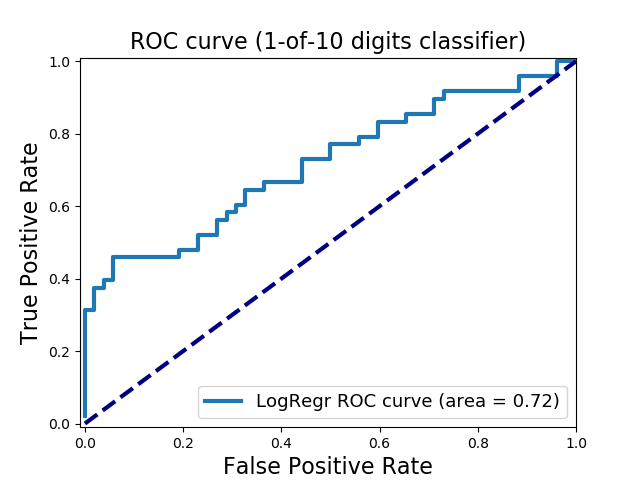

In [52]:
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression().fit(train_x, train_y.values.ravel())
y_score_lr = lr.fit(train_x, train_y.values.ravel()).decision_function(test_x)
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.show()

 <br>
<br>
<a id = 'Conclusion'></a>
# Conclusion

- Based upon above results we can see that Gradient boosting classifer and Random Forest classifier are having best test score for the data. 
- Value of ROC is 0.76 for Logistic Regression Classifier.